<h1>James Perez</h1>
<h2>Data Analysis / Visualization Example - Titanic</h2>

This purpose of this example is to demonstrate a competency in cleaning, analyzing, manipulating, and vizualzing data with the help of pandas, matplotlib, seaborn, jupyter notebook, and .csv data from kaggle.com

In [141]:
#Import libraries and csv data#

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/titanic.csv")

In [142]:
#Verify
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,?,C,?,328,?
1305,3,0,"Zabour, Miss. Thamine",female,?,1,0,2665,14.4542,?,C,?,?,?
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.225,?,C,?,304,?
1307,3,0,"Zakarian, Mr. Ortin",male,27,0,0,2670,7.225,?,C,?,?,?


In [143]:
#Why is 'age' an object?#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pclass     1309 non-null   int64 
 1   survived   1309 non-null   int64 
 2   name       1309 non-null   object
 3   sex        1309 non-null   object
 4   age        1309 non-null   object
 5   sibsp      1309 non-null   int64 
 6   parch      1309 non-null   int64 
 7   ticket     1309 non-null   object
 8   fare       1309 non-null   object
 9   cabin      1309 non-null   object
 10  embarked   1309 non-null   object
 11  boat       1309 non-null   object
 12  body       1309 non-null   object
 13  home.dest  1309 non-null   object
dtypes: int64(4), object(10)
memory usage: 143.3+ KB


In [144]:
#The '?' symbol needs to be changed to 'NaN'#
df["age"].value_counts()

?         263
24         47
22         43
21         41
30         40
         ... 
66          1
0.6667      1
76          1
67          1
26.5        1
Name: age, Length: 99, dtype: int64

In [145]:
#  Changing 'age' column to numeric data type, verifying change, replacing '?' with 'NaN',
#  and trimming dataframe columns that wont be used#

df["age"] = pd.to_numeric(df["age"], errors="coerce")
df = df.loc[:,"pclass":"parch"]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 71.7+ KB


In [146]:
df

,pclass,survived,name,sex,age,sibsp,parch
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2
...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0


In [147]:
#Manipulating data to create a new dataframe with new data#

survival_rate = df.groupby(["sex", "pclass"]).agg(
                                        survived_total=("survived", sum),
                                        survived_percent=("survived", "mean")
                                        )

#Unstacking multi index for easier future plotting#
survival_rate = survival_rate.unstack()

In [148]:
#Verifying#
survival_rate

survived_total          survived_percent                    
pclass              1   2    3                1         2         3
sex                                                                
female            139  94  106         0.965278  0.886792  0.490741
male               61  25   75         0.340782  0.146199  0.152130

In [149]:
#Manipulating data to create a new dataframe with new data#
class_totals = df.groupby("sex")["pclass"].value_counts().unstack()

In [150]:
#Verifying#
class_totals

pclass,1,2,3
sex,,,
female,144,106,216
male,179,171,493


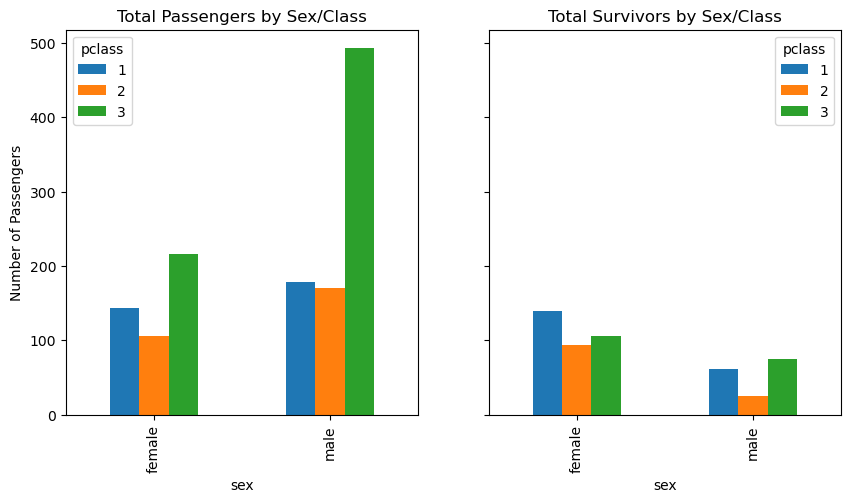

In [151]:
#Comparing total passengers by sex/class to total survivors by sex/class#

# Data shows that, overall, womem where much more likely to survive then men. First and second class passengers
# seemed to fair much better than third class passengers. Still the disparity between the number of classes makes
# the data hard to read. Let's fix that in the next box.

plt.style.use("default")

fg, ax = plt.subplots(1,2, figsize=(10,5), sharey=True)

class_totals.plot.bar(ax=ax[0], title="Total Passengers by Sex/Class", ylabel="Number of Passengers")
survival_rate["survived_total"].plot.bar(ax=ax[1], title="Total Survivors by Sex/Class")

plt.show()

<AxesSubplot:title={'center':'Survival Percentage by Class/Sex'}, xlabel='pclass'>

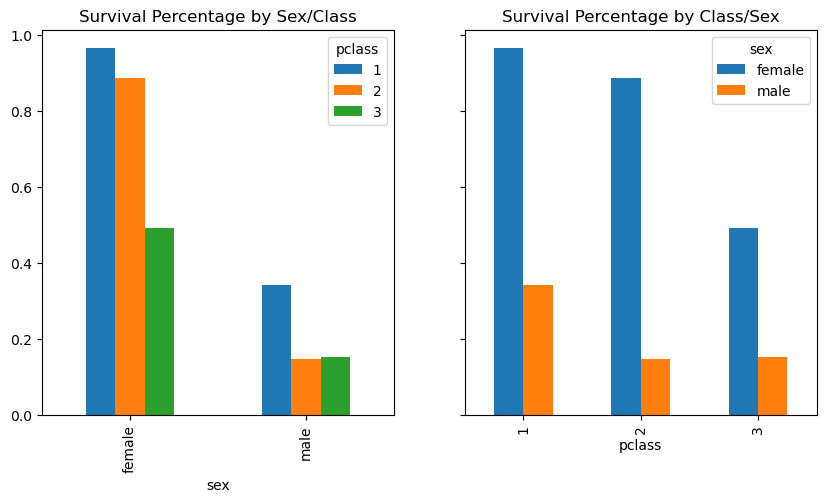

In [152]:
#Data sorted by percentage rather than total number of passengers#
# Shown in this way, the data is more clear. While class did seem to have an impact on chance of survival, it seems that
# sex had the largest impact so far.

# How about age?

fg, ax = plt.subplots(1,2, figsize=(10,5), sharey=True)
survival_rate["survived_percent"].plot.bar(ax=ax[0], title="Survival Percentage by Sex/Class")

survival_rate.stack().unstack(level=0)["survived_percent"].plot.bar(ax=ax[1], title="Survival Percentage by Class/Sex")

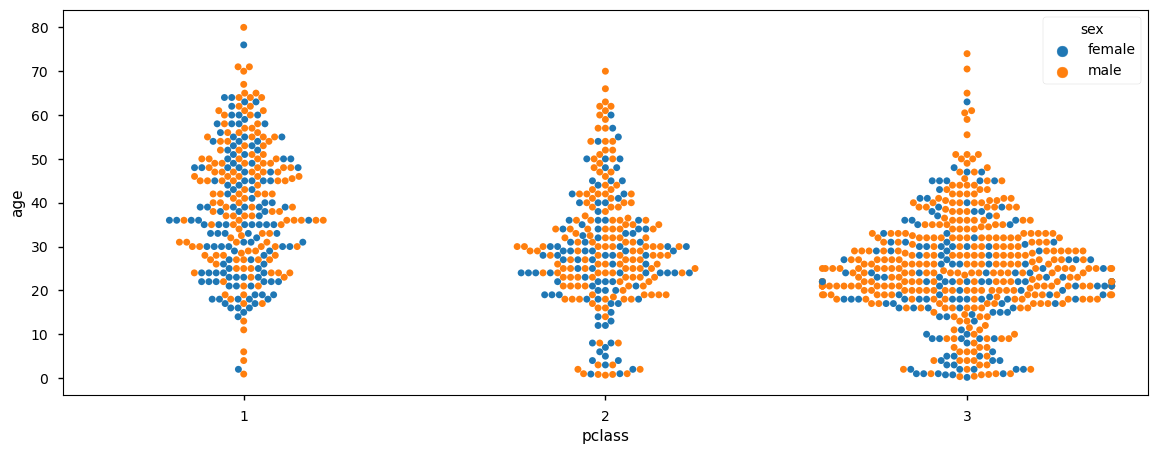

In [159]:
#This plot shows us a few things:
# - Higher classes tended to be higher in age
# - Higher classes had a more even distribution in age
# - First class brought harly any children

# So let's how age played a role in surving

plt.style.use("seaborn-notebook")

plt.figure(figsize=(14,5))
sns.swarmplot(data=df, x="pclass", y="age", hue="sex")

plt.show()

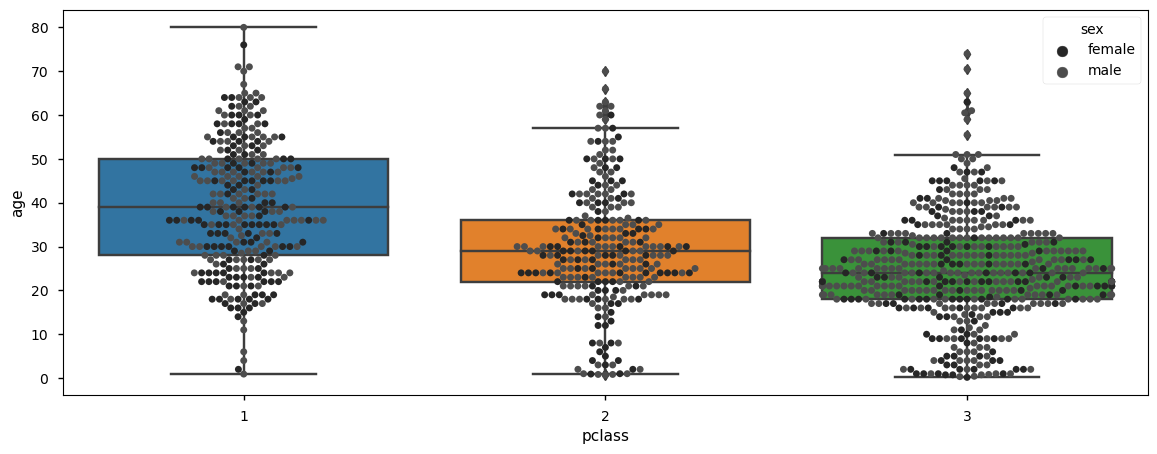

In [162]:
#Another view of the same data

plt.style.use("seaborn-notebook")

plt.figure(figsize=(14,5))
sns.swarmplot(data=df, x="pclass", y="age", hue="sex", color=".3")
sns.boxplot(data=df, x="pclass", y="age")

plt.show()

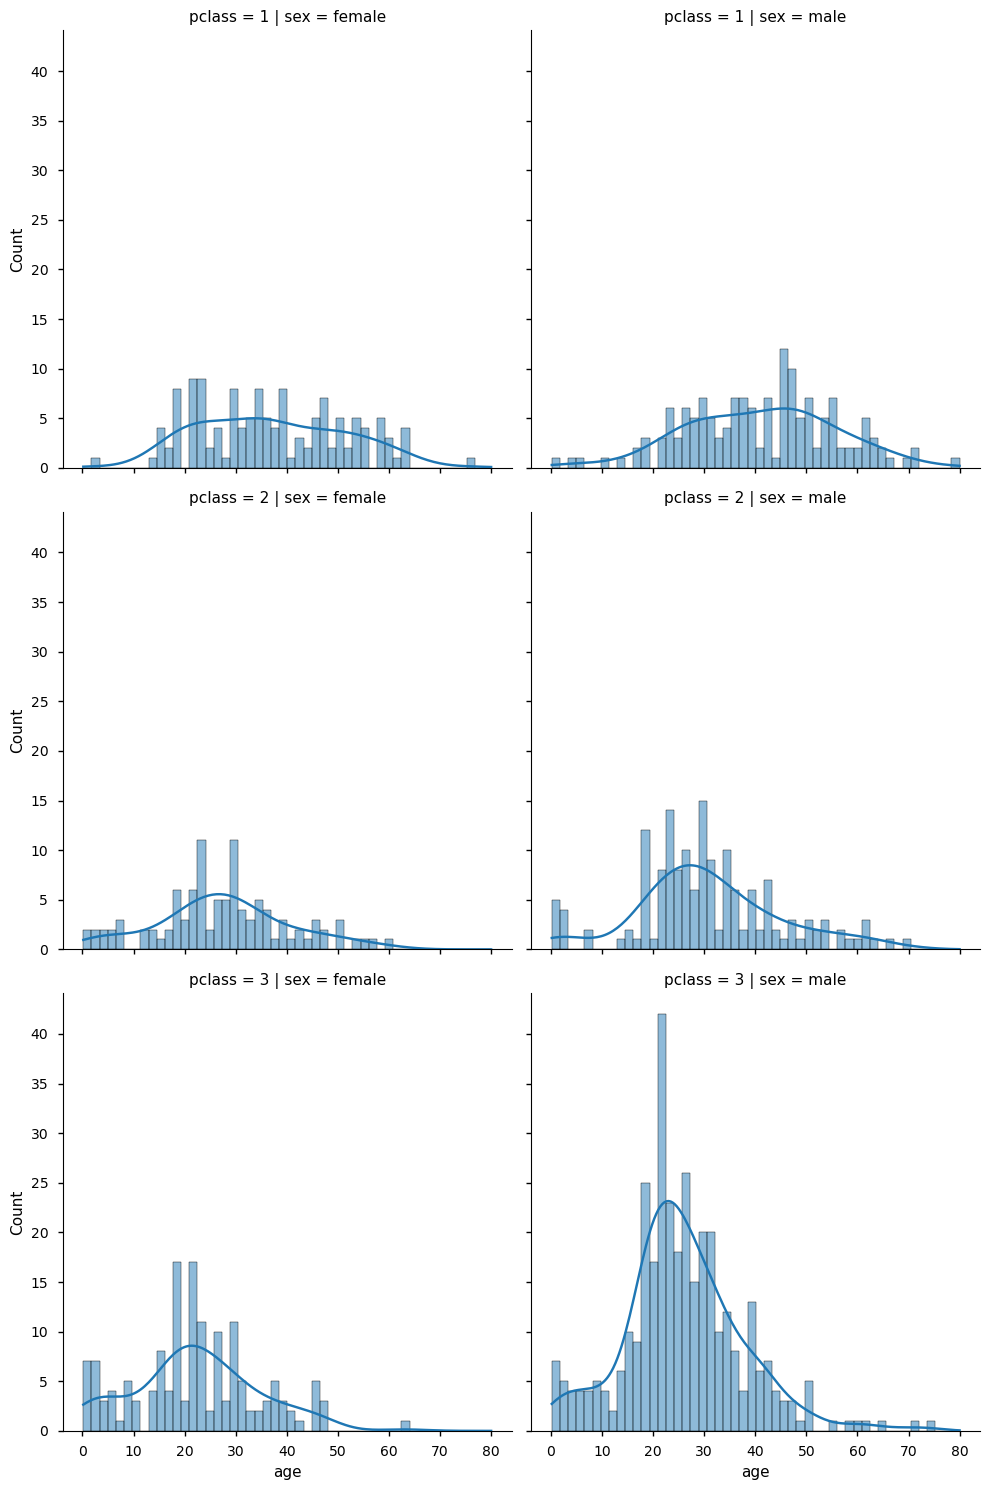

In [179]:
#Another view

sns.displot(data=df, kind="hist", x="age", col="sex", row="pclass",bins=50, kde=True)

In [154]:
#Here I made a simple function to pass onto .apply() so we can categorize ages and have an easier time plotting.

def classify_age(age):
    if age < 13:
        return "Child"
    elif (age >= 13) & (age < 18):
        return "Teen"
    elif (age >= 18) & (age < 35):
        return "Adult"
    elif (age >= 35) & (age < 60):
        return "Middle aged"
    else:
        return "Senior"
    
#Verifying Success
df["age"].apply(classify_age)

0        Adult
1        Child
2        Child
3        Adult
4        Adult
         ...  
1304      Teen
1305    Senior
1306     Adult
1307     Adult
1308     Adult
Name: age, Length: 1309, dtype: object

In [155]:
#Adding new series to main dataframe
df["age_class"] = df["age"].apply(classify_age)

In [156]:
df["age_class"].value_counts()

Adult          547
Middle aged    305
Senior         303
Child           94
Teen            60
Name: age_class, dtype: int64

Text(0.5, 1.0, 'Survival Percentage by Age/Sex')

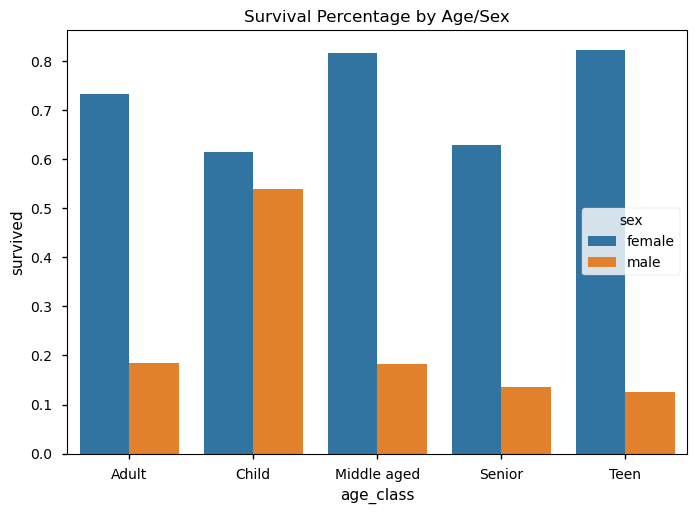

In [157]:
#The data still shows that women were significantly more likely to survive than men.
#The only time sex play a minor or no role was with children.

# Given the data, I think it's safe bet to say the passengers on the Titanic held true
# to the time old adage "Women & Children First"

sns.barplot(data=df, x="age_class", y="survived", hue="sex", ci=0)
plt.title("Survival Percentage by Age/Sex")

Text(0.5, 1.0, 'Survival Percentage by Class/Age')

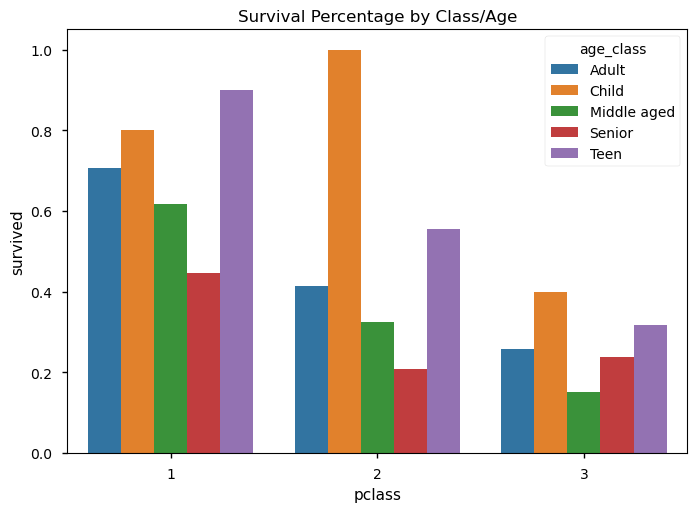

In [158]:
#The data above could give the impression that class did not play a major factor in surviving.
#This plot more clearly shows an approximate 15%-30% difference in survival rate from one class to another.

sns.barplot(data=df, x="pclass", y="survived", hue="age_class", ci=0)
plt.title("Survival Percentage by Class/Age")

# End